Cluster Time Series Experiment

1. motivation: grouping data when doing analysis of a data set has analogy to the concepts of regularization and generalization in supervised machine learning setting in addition to helping the analyst better understand and give explanation to the data. 

2. technique: a common way to divide a set of objects into smaller groups is clustering. (Ward 1963) argued that grouping is useful for analysis of data with many samples and how partitioning the set of objects into smaller groups can yield more information. His illustrating example was that using single statistical mean value of the whole set of objects provided less useful information than having several statistical mean values of each group.

3. question: to build clustering model for stock grouping problem using unsupervised learning. between two linkage methods (single and average) which is better? between two disimilarity measure (dynamic time warping and correlation distance) which is better?

4. hypothesis: time-series objects, in this context stock prices and asset returns, in the same group have similar behavior and their movement can be forecasted the same way.

Hierarchical agglomerative clustering is a procedure to cluster data into group by starting with each data item as its own cluster can sequentially merge similar item into clusters until one cluster containing the whole data set is formed. (Mullner 2013) documented three efficient algorithms for performing hierarchical agglomerative clustering, and noted the seven linkage schemes that can be used in the procedure: single, complete, average, weighted, Ward, centroid, median. The input of clustering procedure is dissimilar index, which measure distance-like quantity between each pair of objects in the data set. The output of clustering procedure is stepwise dendrogram, which indicate at which iteration two items are merged and what distance measurement was at the merge.

In [1]:
import sys
sys.path

['/opt/workspace/tests',
 '/opt/workspace',
 '/opt/workspace/ml_home',
 '/opt/workspace/3.0 Portfolio Selection/TimeSeriesClustering',
 '/opt/conda/lib/python37.zip',
 '/opt/conda/lib/python3.7',
 '/opt/conda/lib/python3.7/lib-dynload',
 '',
 '/opt/conda/lib/python3.7/site-packages',
 '/opt/conda/lib/python3.7/site-packages/IPython/extensions',
 '/home/jovyan/.ipython']

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from data.simulation import dgf10, dgf11, plot_line, gd2df, add_noise, TimeSeries

from data.simulation import make_dataset_linear, make_dataset_exponential
from data.generator import make_gbm_series

## 1. Time Series Data

Data recorded at different times form a set of observations that is a time-series. Time-series data are sequence of obervations. Price of stocks realized over a time period can be modelled as a time-series, as with many other phenomenon.

When there are several sequences, we view each as individual sequence as an object and all sequences as the set of objects.

In this experiment three data sets are analyzed in the same manner to make sure that the methodology is stable.

Data set 1: linear vs exponential series with noise.  
Data set 2: geometric brownian motion series.  
Data set 3: historical prices time series of stocks.

In [3]:
dataset1 = {} # to store dataset
dataset1, df_stat_linear = make_dataset_linear(dataset1, plot=False)
dataset1, df_stat_growth = make_dataset_exponential(dataset1, plot=False)

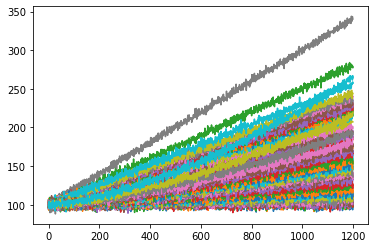

In [10]:
d = [] # rows of data
for k, v in dataset1.items():
    data = v[1][['y']].values # get y from data frame
    plt.plot(data)
    d.append(data)

In [8]:
data.shape

(1200, 1)

In [12]:
d = np.stack(d) # https://numpy.org/doc/stable/reference/generated/numpy.stack.html#numpy.stack
d.shape

(60, 1200, 1)

### Geometric Brownian Motion


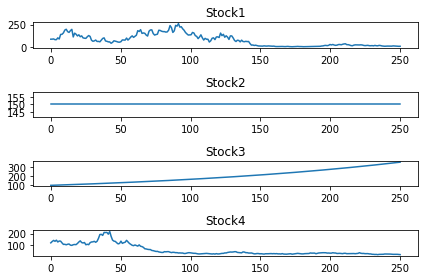

In [50]:
dataset2 = {} # storing data

fix, axes42 = plt.subplots(4,1)

p = range(1,5)
name = ['Stock1', 'Stock2', 'Stock3', 'Stock4']
s0 = [100, 150, 100, 100] # start prices
mu = [0.00005, 0.0, 0.005, -0.0002]
sigma = [0.2, 0.0, 0.0, 0.1]

for i, ticker, start, stock_mu, stock_sigma, axes in zip(p, name, s0, mu, sigma, axes42):
    t, S = make_gbm_series(start, mu=stock_mu, sigma=stock_sigma)
    plt.subplot(4,1,i)
    plt.plot(t,S)
    plt.setp(plt.gca(), title=ticker)
    dataset2[ticker] = (t,S)
    
plt.tight_layout()
plt.show()

In [32]:
pd.DataFrame({'stock':name, 'start':s0, 'mu':mu, 'sigma':sigma})

,stock,start,mu,sigma
0,Stock1,100,0.00005,0.2
1,Stock2,150,0.00000,0.0
2,Stock3,100,0.00010,1.0
3,Stock4,100,-0.00020,0.1


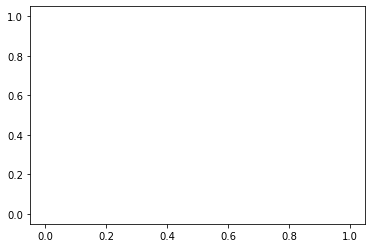

In [41]:
# mu 40, sigma 20 cause overflow
t, S = make_gbm_series(150, 0.40, 0.20)
plt.plot(t,S)

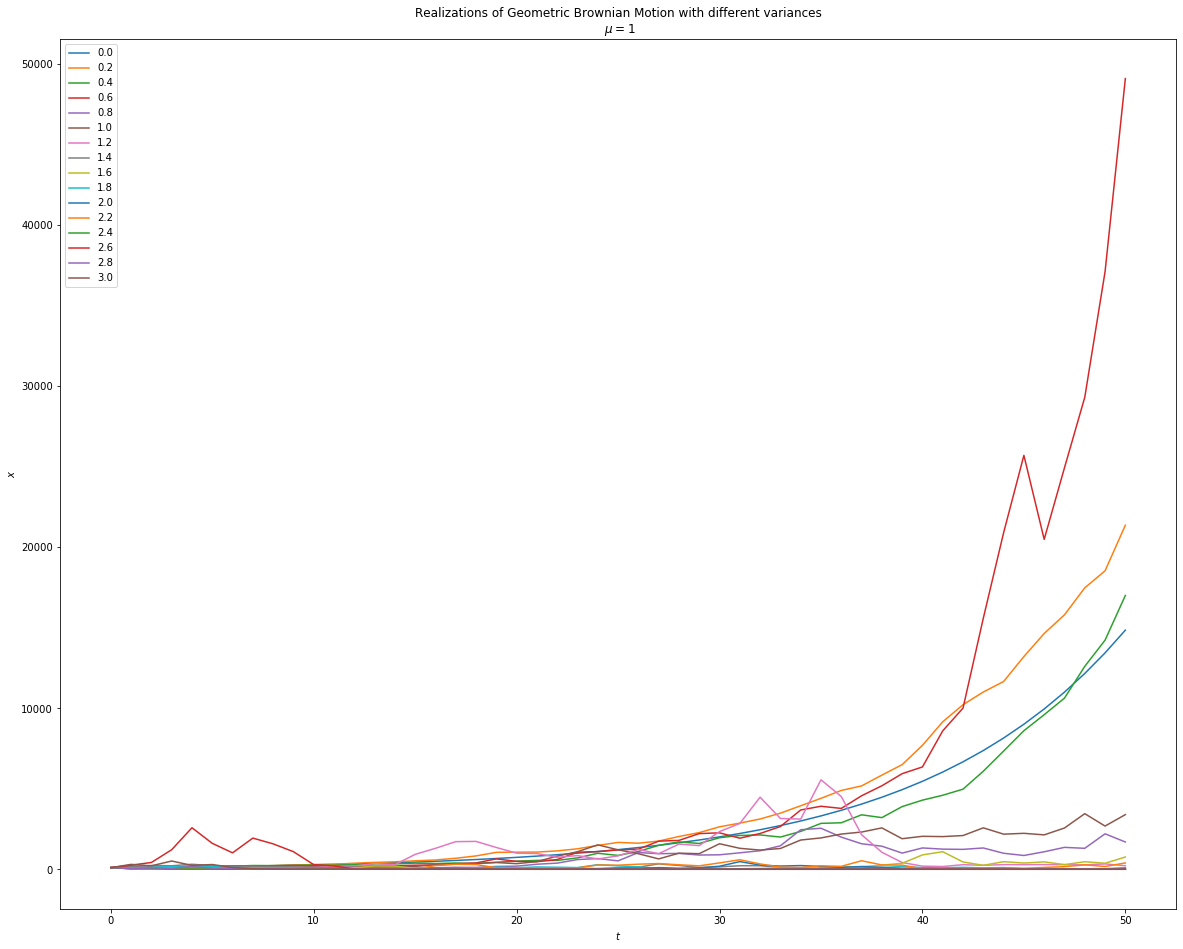

In [45]:
# Python code for the plot

import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(20,16))

mu = 1
n = 50
dt = 0.1
x0 = 100
np.random.seed(1)

# 0.8 - 1.8 is probably normal
# sigma = np.arange(0.8, 2, 0.2)

sigma = np.arange(0.0, 3.2, 0.2)

x = np.exp(
    (mu - sigma ** 2 / 2) * dt
    + sigma * np.random.normal(0, np.sqrt(dt), size=(len(sigma), n)).T
)
x = np.vstack([np.ones(len(sigma)), x])
x = x0 * x.cumprod(axis=0)

plt.plot(x)
plt.legend(np.round(sigma, 2))
plt.xlabel("$t$")
plt.ylabel("$x$")
plt.title(
    "Realizations of Geometric Brownian Motion with different variances\n $\mu=1$"
)
plt.show()

In [38]:
S

array([], dtype=float64)

array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
       2.6, 2.8])